# Calibración de la posición del objeto


**Autor**: Luis Miguel Sánchez Brea.

**Fecha**: 01/07/2019.

**Objetivo**: Puesta a punto de SLM.

**Descripción**: Se pretende determinar la posicion del objeto después del sistema 4f

* se envía una imagen conocida
* se mueven los motores para obtener la posición del objeto. 
* se observa la imagen
* se toma la posicion y se guarda en config.py
- se puede hacer alguna funcion que lo haga de forma automática

In [1]:
%run config_jupyter.ipynb

In [2]:
import time
from pprint import pprint
import cv2
import screeninfo

In [3]:
from diffractio import degrees, mm, plt, sp, um, np
from diffractio.scalar_masks_XY import Scalar_mask_XY

In [4]:
from py_slm.smc100 import SMC100
import py_slm.camera.tisgrabber as IC
from py_slm.py_slm import SLM
from py_slm.config import CONF_HOLOEYE2500, CONF_PACKARD_BELL, CONF_IMAGING_SOURCE


In [5]:
s=1.

### Cargar modulador

In [6]:
import screeninfo
screeninfo.get_monitors()

[monitor(1440x900+0+0), monitor(1024x768+1440+0)]

In [7]:
slm=SLM(config_SLM=CONF_HOLOEYE2500, config_Camera=CONF_IMAGING_SOURCE)

x0=slm.x0
y0=slm.y0
wavelength=slm.wavelength
print(x0.shape, y0.shape)

((1024L,), (768L,))


(<Figure size 360x324 with 1 Axes>,
 <matplotlib.image.AxesImage at 0xd5edb38>)

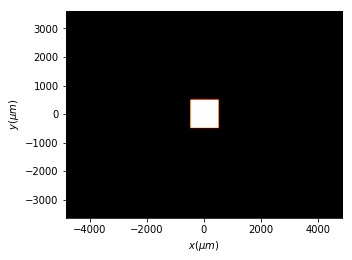

In [8]:
t = Scalar_mask_XY(slm.x0, slm.y0, slm.wavelength)
t.square(r0=(0,0), size=(1*mm, 1*mm), angle=0*degrees)
t.draw(kind='intensity')

### Cargar lente en modulador

In [9]:
"Creamos la imagen a partir de la máscara creada."
slm.mask_to_rawImage(mask_XY=t, kind='intensity', normalize=True);

In [10]:
"Enviamos la imagen al SLM."
slm.send_image_screen()
cv2.waitKey(500)

-1

In [24]:
slm.camera1.SetPropertySwitch("Gain", "Auto", 0)
slm.camera1.SetPropertySwitch("Exposure", "Auto", 0)

1

In [26]:
slm.camera1.SetPropertyValue("Gain", "Value", 3)
slm.camera1.SetPropertyValue("Exposure", "Value", -5)

1

### Cargar motor

In [11]:
smc100 = SMC100(1, 'COM3', silent=True)
smc100.set_velocity(20*mm/s, check=True)
smc100.home()

Connecting to SMC100 on COM3
(20.0, 20.0)


In [12]:
smc100.move_absolute(116.1*mm)

Ahora de forma manual se mueve el motor 

In [1]:
smc100.set_velocity(1*mm/s, check=True)
smc100.move_absolute(112.7*mm)

NameError: name 'smc100' is not defined

cuando se tenga la posición se guarda la imagen

## Cerrar

In [14]:
smc100.close()